Detalle de la tarea: Realizar un python  - jupyter en el cual: 

* ~**seleccione cuales sus datos a analizar**~
* ~**indique el origen de es datos, link, descripción**~
* ~**describa el contenido de las columnas**~
* ~**debe establecer la lectura de los datos y carga en un dataframe (utilice pandas)**~
* **debe realizar como mínimo 4 gráficos y estos deben tener la siguiente configuración**
    * **texto con pregunta, explicación del gráfico, la importancia del análisis y los datos involucrados**
    * **instrucciones python para la creación de gráficos estadísticos, sugerencia utilizar pandas y matplotlib**
    * **imagen del gráfico**
* ~**debe por lo menos tener un gráfico de torta, uno de barra y uno de curvas (pueden incluir más de una categoria, ejemplo: sexo masculino, femenino, otro)**~
* **si cree necesario generar más gráficos para explicar su análisis, puede hacerlo**

Nota: el ayudante es Matias Martínez, a quien copio en este email.


===============================================================================================

Se analizaran datos meteorologicos del pais recolectados del año 2023. Los datos seran extraidos del sitio Dirección Meteorológica de Chile - Servicios Climáticos de la Dirección General De Aeronáutica Civil. El sitio contempla una amplia cantidad de datos meteorologicos de diferentes ambitos, recolectados de varias estaciones posicionadas a lo largo del pais.

Link al sitio: https://climatologia.meteochile.gob.cl/

Los datos descargados del sitio vienen en planillas excel separadas con diferentes formatos. Por ello, se ha decidido preprocesar los datos descargados para consolidarlos en archivos que contemplen los datos de una estacion particular, que contemple las columnas relevantes para el analisis. Para efectos de simplicidad, se han elegido 5 estaciones localizadas a lo largo del pais(Zona norte, centro y sur)

A continuacion se describen las columnas del archivo resultante:
- Fecha y hora del registro
- La estación meteorologica de la cual se extrajo el dato, denotada por el identificador de dicha estacion
- Radiacion Global Instantanea, medida en watt/m2
- Temperatura, medida en celsius
- Agua caida en un periodo de 6 horas, medida en mm
- Velocidad del viento, medida en nudos(kt)
- Nivel de humedad relativa del aire, denotada por un porcentaje.

===============================================================================================

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import ipywidgets as widgets
from sklearn.linear_model import LinearRegression

#Lectura de identificadores
#Como los archivos descargados siguen un formato que involucra el identificador, es util tener a mano estos datos para agrupar los datos

f = open("Datos/ID_Estaciones.txt", "r")
ids = []
lines = f.readlines()

for line in lines:
    ids.append(line.split(",")[2].split("\n")[0])

print(ids)

['510005', '400009', '180005', '330020', '550001']


In [ ]:
## Agrupacion de datos.
#
#Se agrupa los diferentes archivos de datos descargados en uno solo, con el proposito de facilitar la lectura y el acceso de los datos para el futuro.

for id in ids:
    
    df = pd.read_csv("Datos/"+ id +"/"+ id +"_2023_Agua6Horas_.csv", delimiter=";")
    df2 = pd.read_csv("Datos/"+ id +"/"+ id +"_2023_Humedad_.csv", delimiter=";")
    df3 = pd.read_csv("Datos/"+ id +"/"+ id +"_2023_Temperatura_.csv", delimiter=";")
    df4 = pd.read_csv("Datos/"+ id +"/"+ id +"_2023_Viento_.csv", delimiter=";")
    
    meses = ["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"]
    
    df5 = pd.DataFrame(columns=['momento', 'RadGInst (watt/m2)'])
    
    for x in meses:
        tempDf = pd.DataFrame(columns=['momento', 'RadGInst (watt/m2)'])
        fragDf = pd.read_html("Datos/"+ id +"/Radiacion/"+x+".xls")[0]
        tempDf['momento'] = fragDf['Fecha'].astype(str) + " " + fragDf['Hora (UTC)'] +":00"
        tempDf['RadGInst (watt/m2)'] = fragDf['RadGInst (watt/m2)']
        if(df5.size == 0):
            df5 = pd.concat([tempDf], ignore_index = True)
        else:
            df5 = pd.concat([df5,tempDf], ignore_index = True)
    
    df5["index"] = id
        
    dfArr = [df,df2,df3,df4,df5]
    
    maxDf = dfArr[0]
    
    for x in dfArr:
        if(x.iloc[:,0].size > maxDf.iloc[:,0].size):
            maxDf = x
            
    if(maxDf.columns.values[0] != "momento"):
        cleanDf = maxDf.reset_index().iloc[:,:2]
        cleanDf.columns.values[1] = "momento"
    else:
        cleanDf = maxDf.iloc[:,[0,2]]
        
    newFrame = ["HR_Valor", "RRR6_Valor", "ff_Valor", "T_Valor", "RadGInst(watt/m2)"]
    
    col = df.reset_index().iloc[:,1:3]
    col1 = df2.reset_index().iloc[:,1:]
    col2 = df3.reset_index().iloc[:,1:]
    col3 = df4.reset_index().iloc[:,[1,3]]
    col4 = df5.iloc[:,:2]
    
    col.rename(columns = {'level_1':'momento'}, inplace = True) 
    col1.rename(columns = {'CodigoNacional':'momento'}, inplace = True) 
    col2.rename(columns = {'CodigoNacional':'momento'}, inplace = True) 
    col3.rename(columns = {'level_1':'momento'}, inplace = True) 
        
    df_merged = cleanDf.merge(col, on = 'momento', how = 'left')
    df_merged = df_merged.merge(col1, on = 'momento', how = 'left')
    df_merged = df_merged.merge(col2, on = 'momento', how = 'left')
    df_merged = df_merged.merge(col3, on = 'momento', how = 'left')
    
    df_merged = df_merged.merge(col4, on = 'momento', how = 'left')

    df_merged.columns.values[0] = "ID_Estacion"
    df_merged.columns.values[2] = "RR6_Valor"
    df_merged.columns.values[3] = "HR_Valor"
    df_merged.columns.values[4] = "Ts_Valor"
    df_merged.columns.values[5] = "ff_Valor"
    
    df_merged.to_excel(id+"_agrupado.xlsx")
    print('DataFrame de id: '+id+' generado con exito')

In [28]:
bigDf = pd.DataFrame()
for id in ids:
    df = pd.read_excel(id+"_agrupado.xlsx", sheet_name="Sheet1")
    if(bigDf.size == 0):
        bigDf = pd.concat([df.iloc[:,1:]], ignore_index = True)
    else:
        bigDf = pd.concat([bigDf,df.iloc[:,1:]], ignore_index = True)

bigDf["momento"] = pd.to_datetime(bigDf["momento"], format="%d-%m-%Y %H:%M:%S")
bigDf

,ID_Estacion,momento,RR6_Valor,HR_Valor,Ts_Valor,ff_Valor,RadGInst (watt/m2)
0,510005,2023-01-01 00:00:00,0.0,57.8,9.7,23.0,78.1
1,510005,2023-01-01 01:00:00,NaN,61.6,8.8,22.0,7.7
2,510005,2023-01-01 02:00:00,NaN,62.0,8.1,20.0,0.0
3,510005,2023-01-01 03:00:00,NaN,59.6,8.7,20.0,0.0
4,510005,2023-01-01 04:00:00,NaN,58.8,8.9,17.0,0.0
...,...,...,...,...,...,...,...
43241,550001,2023-12-31 19:00:00,NaN,31.0,13.7,12.0,628.8
43242,550001,2023-12-31 20:00:00,NaN,30.0,14.0,16.0,833.5
43243,550001,2023-12-31 21:00:00,NaN,30.0,14.0,14.0,655.5
43244,550001,2023-12-31 22:00:00,NaN,35.9,13.4,10.0,490.6


16.23445898294449
17.76883602142334
28.76998782157898
24.50643926858902
12.720277905464172


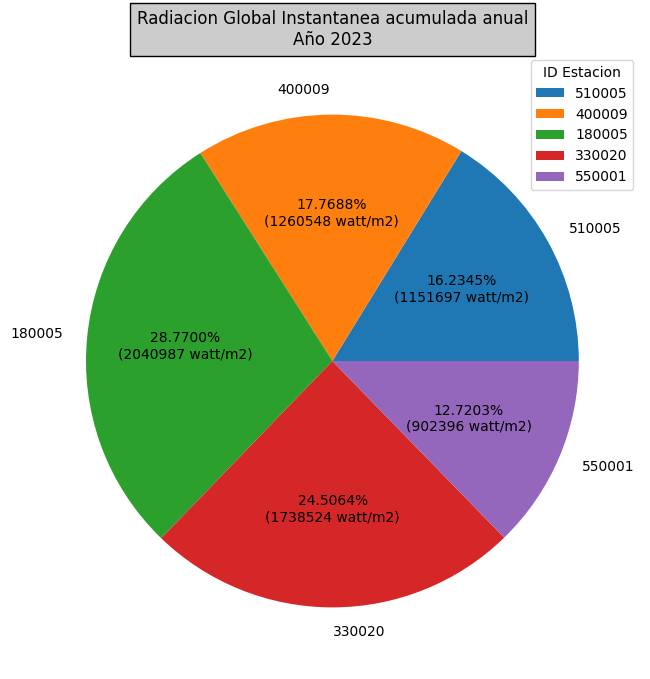

In [21]:
#¿De la radiacion solar total acumulada en el año, cual de las estaciones es la que aporta más radiacion?
plt.rcParams['figure.figsize'] = [10, 8]

def my_fmt(x):
    print(x)
    return '{:.4f}%\n({:.0f} watt/m2)'.format(x, total*x/100)
    
estaciones = []
radiacionAnual = []
for i in range(0,len(ids)):
    estaciones.append(bigDf.query('ID_Estacion == '+ids[i]))
    radiacionAnual.append(estaciones[i]["RadGInst (watt/m2)"].sum())

total = sum(radiacionAnual)
plt.pie(radiacionAnual, labels=ids, autopct=my_fmt)
plt.legend(title = "ID Estacion")
plt.title("Radiacion Global Instantanea acumulada anual\nAño 2023", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

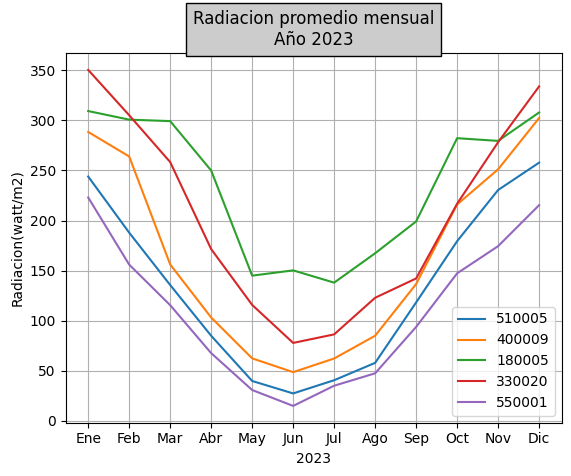

In [4]:
#Radiacion promedio de cada estacion a lo largo del año.

meanDf = pd.DataFrame(columns=ids)
for x in range(1,13):
    if(x < 10):
        filtered_df = bigDf[bigDf['momento'].str.contains('-0'+str(x)+'-')]
    else:
        filtered_df = bigDf[bigDf['momento'].str.contains('-'+str(x)+'-')]
    temp = pd.DataFrame(columns=ids)
    for id in ids:
        est = filtered_df.query('ID_Estacion == '+id)
        temp[id] = [est["RadGInst (watt/m2)"].mean()]
    if(meanDf.size == 0):
        meanDf = pd.concat([temp], ignore_index=True)
    else:
        meanDf = pd.concat([meanDf,temp], ignore_index=True)

meanDf

meses = ["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"]

for id in ids:
    plt.plot(meses, meanDf[id], label = id) 

plt.xlabel("2023")
plt.ylabel("Radiacion(watt/m2)")
plt.grid()
plt.legend()
plt.title("Radiacion promedio mensual\nAño 2023", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

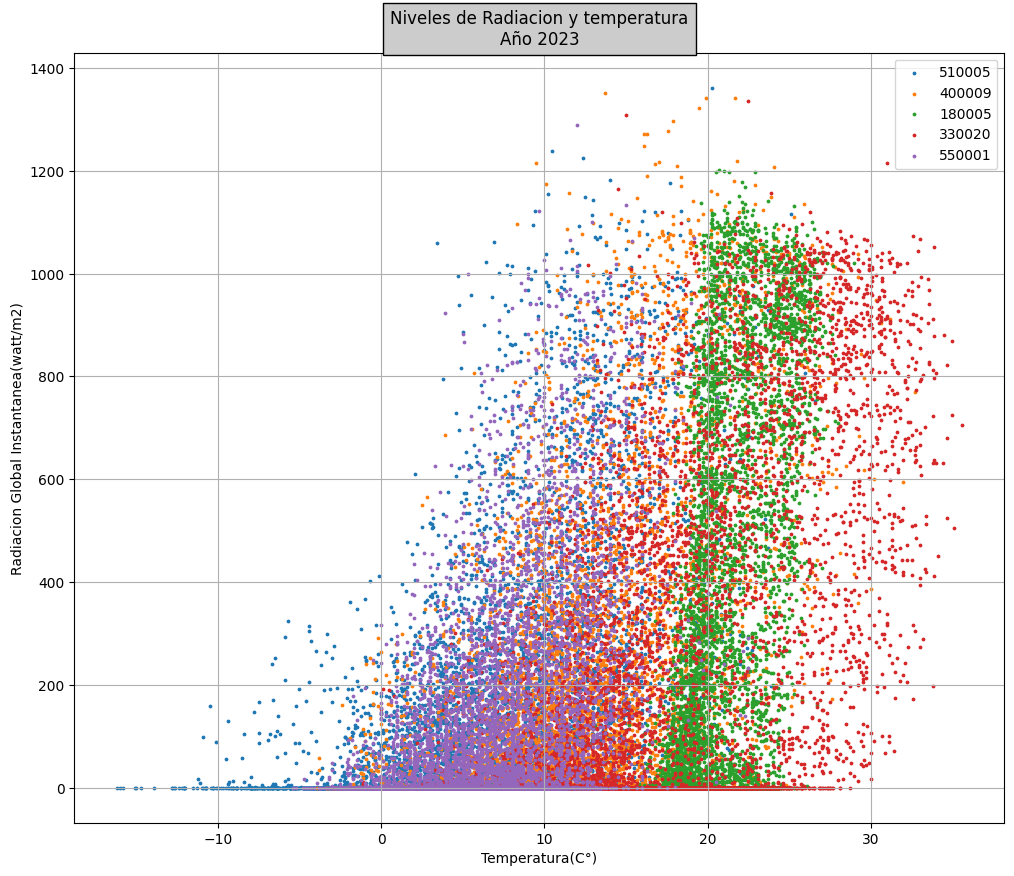

In [7]:
#Relacion radiacion y temperatura.



################

for id in ids:
    filtered_df = bigDf.query('ID_Estacion == '+id)
    #horas = filtered_df['momento'].str.replace(r'^[0-9]{2}-[0-9]{2}-[0-9]{4}\s{1}','', regex=True)
    plt.scatter(filtered_df["Ts_Valor"], filtered_df["RadGInst (watt/m2)"], label = id, s=3)


plt.legend()
plt.xlabel("Temperatura(C°)")
plt.ylabel("Radiacion Global Instantanea(watt/m2)")
plt.title("Niveles de Radiacion y temperatura\nAño 2023", bbox={'facecolor':'0.8', 'pad':5})
plt.rcParams['figure.figsize'] = [12, 10]
plt.grid()
# Creating figure

plt.show()

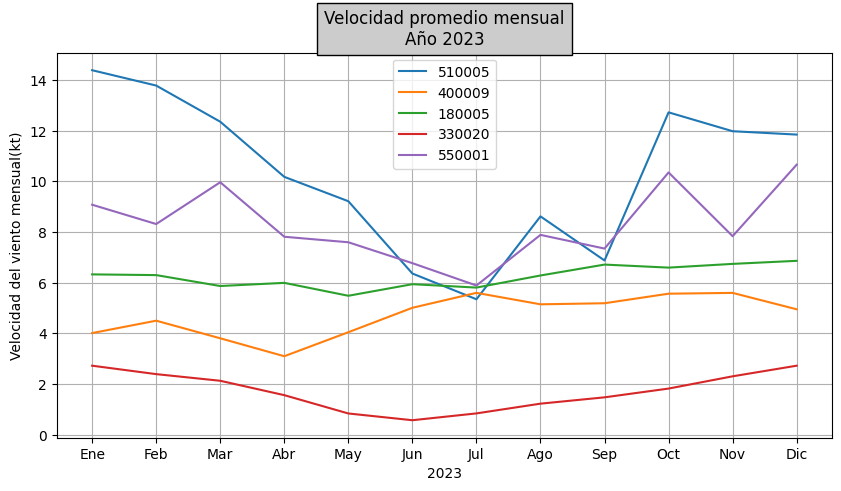

In [8]:
#Velocidad del viento promedio del año, medida por mes.

meanDf = pd.DataFrame(columns=ids)
for x in range(1,13):
    if(x < 10):
        filtered_df = bigDf[bigDf['momento'].str.contains('-0'+str(x)+'-')]
    else:
        filtered_df = bigDf[bigDf['momento'].str.contains('-'+str(x)+'-')]
    temp = pd.DataFrame(columns=ids)
    for id in ids:
        est = filtered_df.query('ID_Estacion == '+id)
        temp[id] = [est["ff_Valor"].sum()/est["ff_Valor"].size]
    if(meanDf.size == 0):
        meanDf = pd.concat([temp], ignore_index=True)
    else:
        meanDf = pd.concat([meanDf,temp], ignore_index=True)

meanDf

meses = ["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"]
plt.rcParams['figure.figsize'] = [10, 5]

for id in ids:
    plt.plot(meses, meanDf[id], label = id) 

plt.xlabel("2023")
plt.ylabel("Velocidad del viento mensual(kt)")
plt.legend()
plt.title("Velocidad promedio mensual\nAño 2023", bbox={'facecolor':'0.8', 'pad':5})
plt.grid()
plt.show()

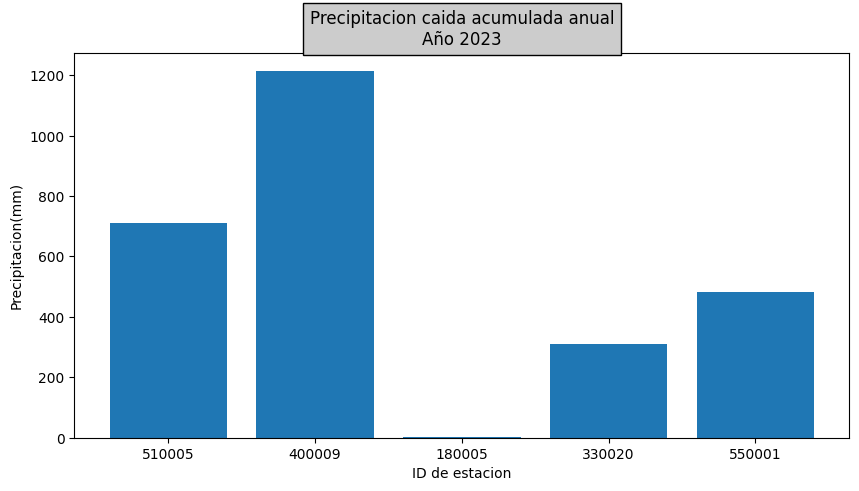

In [7]:
#Agua caida total al año, medida por estacion.

estaciones = []
precipitacionTotal = []
for i in range(0,len(ids)):
    estaciones.append(bigDf.query('ID_Estacion == '+ids[i]))
    precipitacionTotal.append(estaciones[i]["RR6_Valor"].sum())

plt.xlabel("ID de estacion")
plt.ylabel("Precipitacion(mm)")
plt.bar(ids,precipitacionTotal)
plt.rcParams['figure.figsize'] = [7, 5]
plt.title("Precipitacion caida acumulada anual\nAño 2023", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

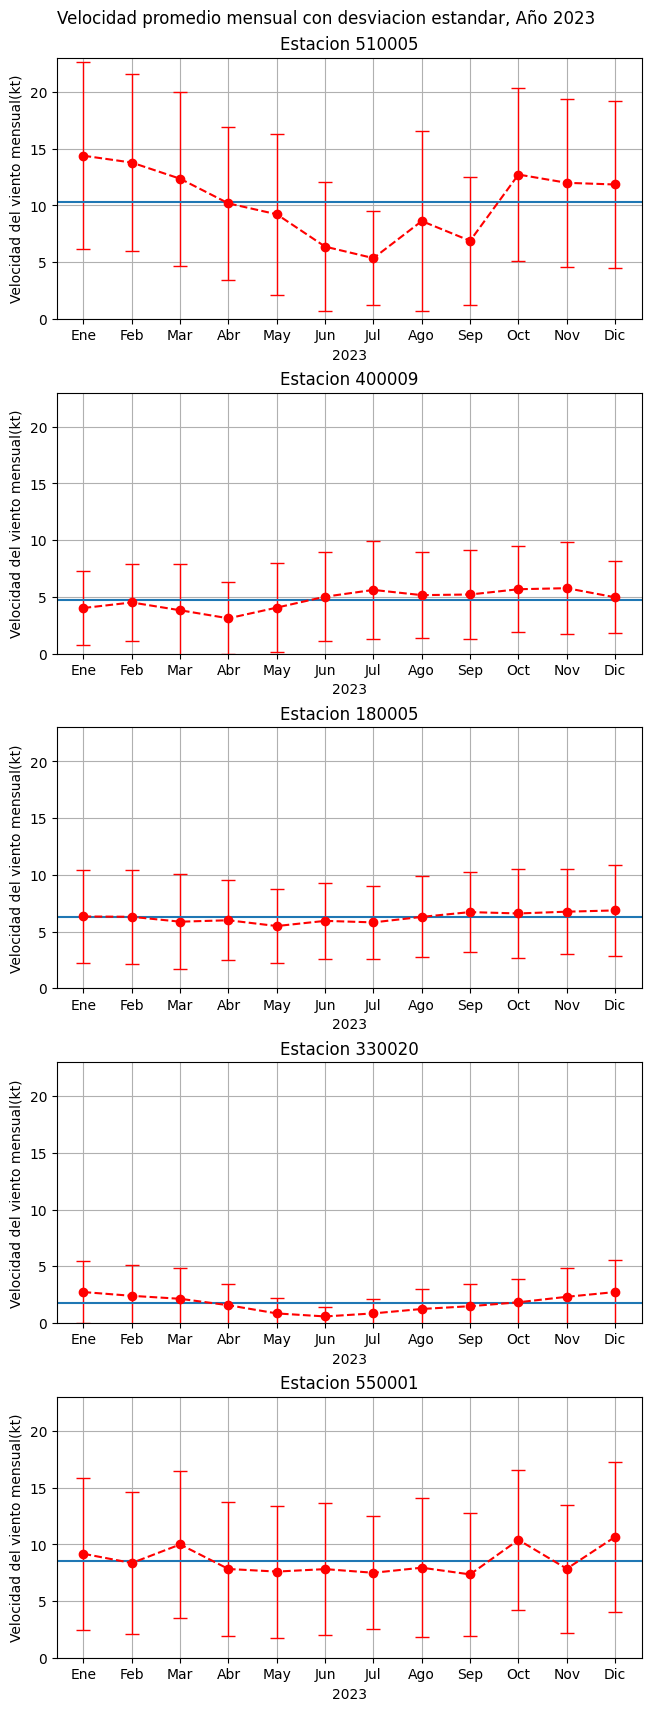

In [8]:
#Velocidad del viento promedio del año, medida por mes - Con media, desviacion estandar y moda?? (CON OUTLIERS)

meanDf = pd.DataFrame(columns=ids)
for x in range(1,13):
    if(x < 10):
        filtered_df = bigDf[bigDf['momento'].str.contains('-0'+str(x)+'-')]
    else:
        filtered_df = bigDf[bigDf['momento'].str.contains('-'+str(x)+'-')]
    temp = pd.DataFrame(columns=ids)
    for id in ids:
        est = filtered_df.query('ID_Estacion == '+id)
        temp[id] = [est["ff_Valor"].mean()]
        temp[id+"_std"] = [est["ff_Valor"].std()]
    if(meanDf.size == 0):
        meanDf = pd.concat([temp], ignore_index=True)
    else:
        meanDf = pd.concat([meanDf,temp], ignore_index=True)

meanDf

meses = ["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"]

fig, axs = plt.subplots(len(ids), constrained_layout=True)
fig.set_figheight(17)
fig.suptitle("Velocidad promedio mensual con desviacion estandar, Año 2023")

for x in range(len(ids)):
    axs[x].errorbar(meses, meanDf[ids[x]], meanDf[ids[x]+"_std"], capsize=5, fmt="r--o", elinewidth=1, label = ids[x])
    axs[x].axhline(meanDf[ids[x]].mean())
    axs[x].set_title("Estacion "+ ids[x])
    axs[x].set_xlabel("2023")
    axs[x].set_ylabel("Velocidad del viento mensual(kt)")
    axs[x].grid()
    axs[x].set_ylim(0,23)
    
plt.show()

array([35., 36., 36., 40., 35., 37., 38., 38., 35., 36., 38., 37., 91.,
       36., 37., 35., 35., 35.])

,ID_Estacion,momento,RR6_Valor,HR_Valor,Ts_Valor,ff_Valor,RadGInst (watt/m2)
549,510005,23-01-2023 20:00:00,NaN,32.0,16.6,35.0,718.4
2021,510005,25-03-2023 19:00:00,NaN,41.0,13.9,35.0,453.4
5235,510005,05-08-2023 16:00:00,NaN,60.0,8.4,35.0,207.5
7927,510005,25-11-2023 18:00:00,0.0,46.0,14.6,35.0,920.9
7929,510005,25-11-2023 20:00:00,NaN,49.0,12.5,35.0,650.9
8339,510005,12-12-2023 20:00:00,NaN,52.0,11.7,35.0,286.4


--------


array([15., 16., 15., 15., 16., 19., 19., 17., 15., 17., 18., 20., 19.,
       24., 20., 16., 19., 15., 15., 15., 15., 16., 17., 15., 15., 16.,
       15., 15., 16., 19., 15., 16., 15., 19., 16., 17., 19., 16., 16.,
       15., 16., 18., 15., 15., 18., 15., 16., 17., 20., 19., 19., 17.,
       20., 21., 15., 17., 15., 15., 16., 15., 18., 17., 15., 15., 15.,
       15., 15., 15., 15., 16., 15., 16., 15., 15., 16., 16., 15., 15.,
       17., 17., 20., 19., 23., 17., 15., 17., 15., 15., 16., 15., 15.,
       15., 17., 16., 17., 17., 17., 15., 15., 17., 15., 16., 15., 15.,
       15., 15., 17., 20., 16., 18., 20., 17., 16., 17., 16., 21., 16.,
       17., 20., 18., 17., 17., 15., 16., 19., 15., 18., 19., 15., 16.,
       16., 15., 15., 17., 17., 15., 18., 19., 15., 15., 16., 16., 21.,
       18., 16., 15., 16.])

,ID_Estacion,momento,RR6_Valor,HR_Valor,Ts_Valor,ff_Valor,RadGInst (watt/m2)
9351,400009,23-01-2023 20:00:00,NaN,50.0,24.3,15.0,1064.2
9617,400009,03-02-2023 20:00:00,NaN,36.0,26.9,15.0,782.1
10358,400009,06-03-2023 14:00:00,NaN,75.0,18.0,15.0,92.0
10463,400009,10-03-2023 19:00:00,NaN,55.0,22.8,15.0,739.1
10493,400009,12-03-2023 01:00:00,NaN,81.0,17.6,15.0,0.0
10560,400009,14-03-2023 20:00:00,NaN,66.0,18.5,15.0,148.1
10561,400009,14-03-2023 21:00:00,NaN,69.0,17.7,15.0,67.5
10900,400009,28-03-2023 18:00:00,0.0,53.0,15.6,15.0,345.5
11646,400009,28-04-2023 13:00:00,NaN,94.0,13.8,15.0,NaN
11651,400009,28-04-2023 18:00:00,9.4,93.0,14.2,15.0,178.1


--------


array([20., 19., 19., 22., 19., 19.])

,ID_Estacion,momento,RR6_Valor,HR_Valor,Ts_Valor,ff_Valor,RadGInst (watt/m2)
18243,180005,07-02-2023 19:00:00,NaN,67.0,24.5,20.0,905.2


--------


array([12., 11., 16.,  9.,  9., 11., 11., 10., 16.,  9., 10.,  9., 11.,
       11.,  9., 11., 18., 14., 12., 11., 12., 16.,  9., 10.,  8., 12.,
       11., 15.,  9., 14., 10., 16., 12.,  9., 12.,  9., 11., 16.,  9.,
       10.,  9.,  9.,  8.,  8., 14., 12., 16., 10., 11., 11., 11., 11.,
        9., 11., 11., 11.,  9.,  9., 11., 12., 14., 15., 11., 15., 12.,
        9., 12., 10., 12., 20., 15., 12., 12.,  9.,  8., 11., 11., 11.,
       10.,  9.,  9., 10., 14.,  9., 12.,  9.,  9., 11.,  9., 14., 11.,
       11.,  8.,  8.,  8., 11.,  8., 11., 11., 10.,  9., 12., 20.,  9.,
       10., 11., 10., 11., 11., 15., 10.,  9., 10., 10., 11., 11., 10.,
       11.,  9.,  9., 12., 12., 12., 14.,  9.,  9.,  8.,  9.,  9., 11.,
       11., 11., 10., 11., 11., 14., 14., 11., 11., 10., 16., 14., 12.,
       10., 11., 12.,  8.,  9., 15., 15., 11., 14., 11.,  9., 11.,  8.,
        9.,  9., 10.,  9., 12.,  8., 11., 14.,  9.,  9., 12., 16., 16.,
       11., 16., 11.,  9., 16.,  9.,  9.,  9., 11., 11., 10., 10

,ID_Estacion,momento,RR6_Valor,HR_Valor,Ts_Valor,ff_Valor,RadGInst (watt/m2)
26199,330020,04-01-2023 19:00:00,NaN,26.0,32.4,12.0,902.6
26539,330020,18-01-2023 23:00:00,NaN,35.0,27.4,12.0,94.1
26753,330020,27-01-2023 21:00:00,NaN,24.0,31.8,12.0,517.9
26847,330020,31-01-2023 19:00:00,NaN,31.0,30.2,12.0,879.5
26948,330020,05-02-2023 00:00:00,0.0,50.0,24.1,12.0,0.0
27040,330020,08-02-2023 20:00:00,NaN,32.0,32.0,12.0,637.4
27376,330020,22-02-2023 20:00:00,NaN,29.0,29.9,12.0,648.5
27713,330020,08-03-2023 21:00:00,NaN,37.0,28.6,12.0,365.0
27904,330020,16-03-2023 20:00:00,NaN,27.0,29.6,12.0,549.5
27997,330020,20-03-2023 17:00:00,NaN,38.0,28.2,12.0,880.7


--------


array([29., 34., 34., 33., 30., 37., 33., 32., 30., 37., 30., 29., 33.,
       30., 29., 35., 29., 30., 32., 33., 29., 29., 31.])

,ID_Estacion,momento,RR6_Valor,HR_Valor,Ts_Valor,ff_Valor,RadGInst (watt/m2)
34929,550001,03-01-2023 14:00:00,NaN,70.0,6.6,29.0,199.6
36767,550001,20-03-2023 13:12:00,NaN,NaN,10.0,29.0,NaN
37512,550001,19-04-2023 20:00:00,NaN,42.0,10.3,29.0,48.9
41335,550001,13-10-2023 17:00:00,NaN,75.0,8.0,29.0,384.7
42305,550001,22-11-2023 12:00:00,0.0,80.0,5.4,29.0,159.3
43103,550001,26-12-2023 12:00:00,0.0,50.0,12.0,29.0,425.1


--------


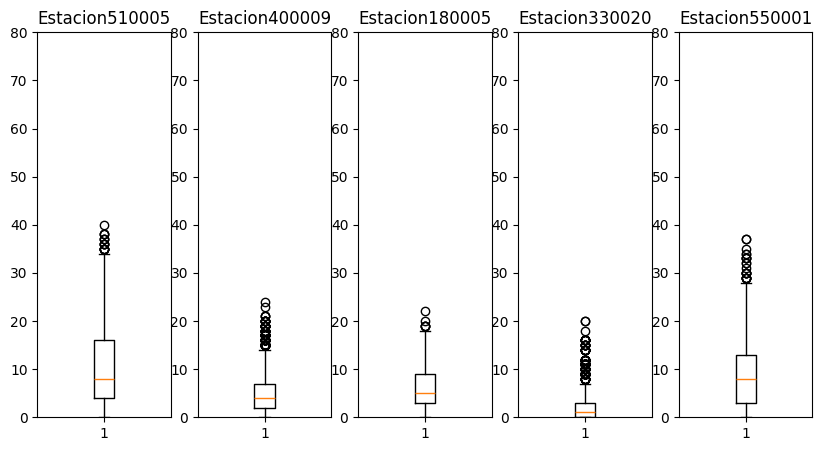

In [47]:
fig, axs = plt.subplots(1, len(ids))
for x in range(len(ids)):
    est = bigDf.query('ID_Estacion == '+ids[x])
    rawData = axs[x].boxplot(est["ff_Valor"].dropna())
    axs[x].set_title('Estacion'+ids[x])
    axs[x].set_ylim(0,80)
    outlier_points = rawData["fliers"][0].get_data()[1]
    test = est.query('ff_Valor == '+ str(outlier_points[0]))
    display(outlier_points)
    display(test)
    print("--------")
plt.show()

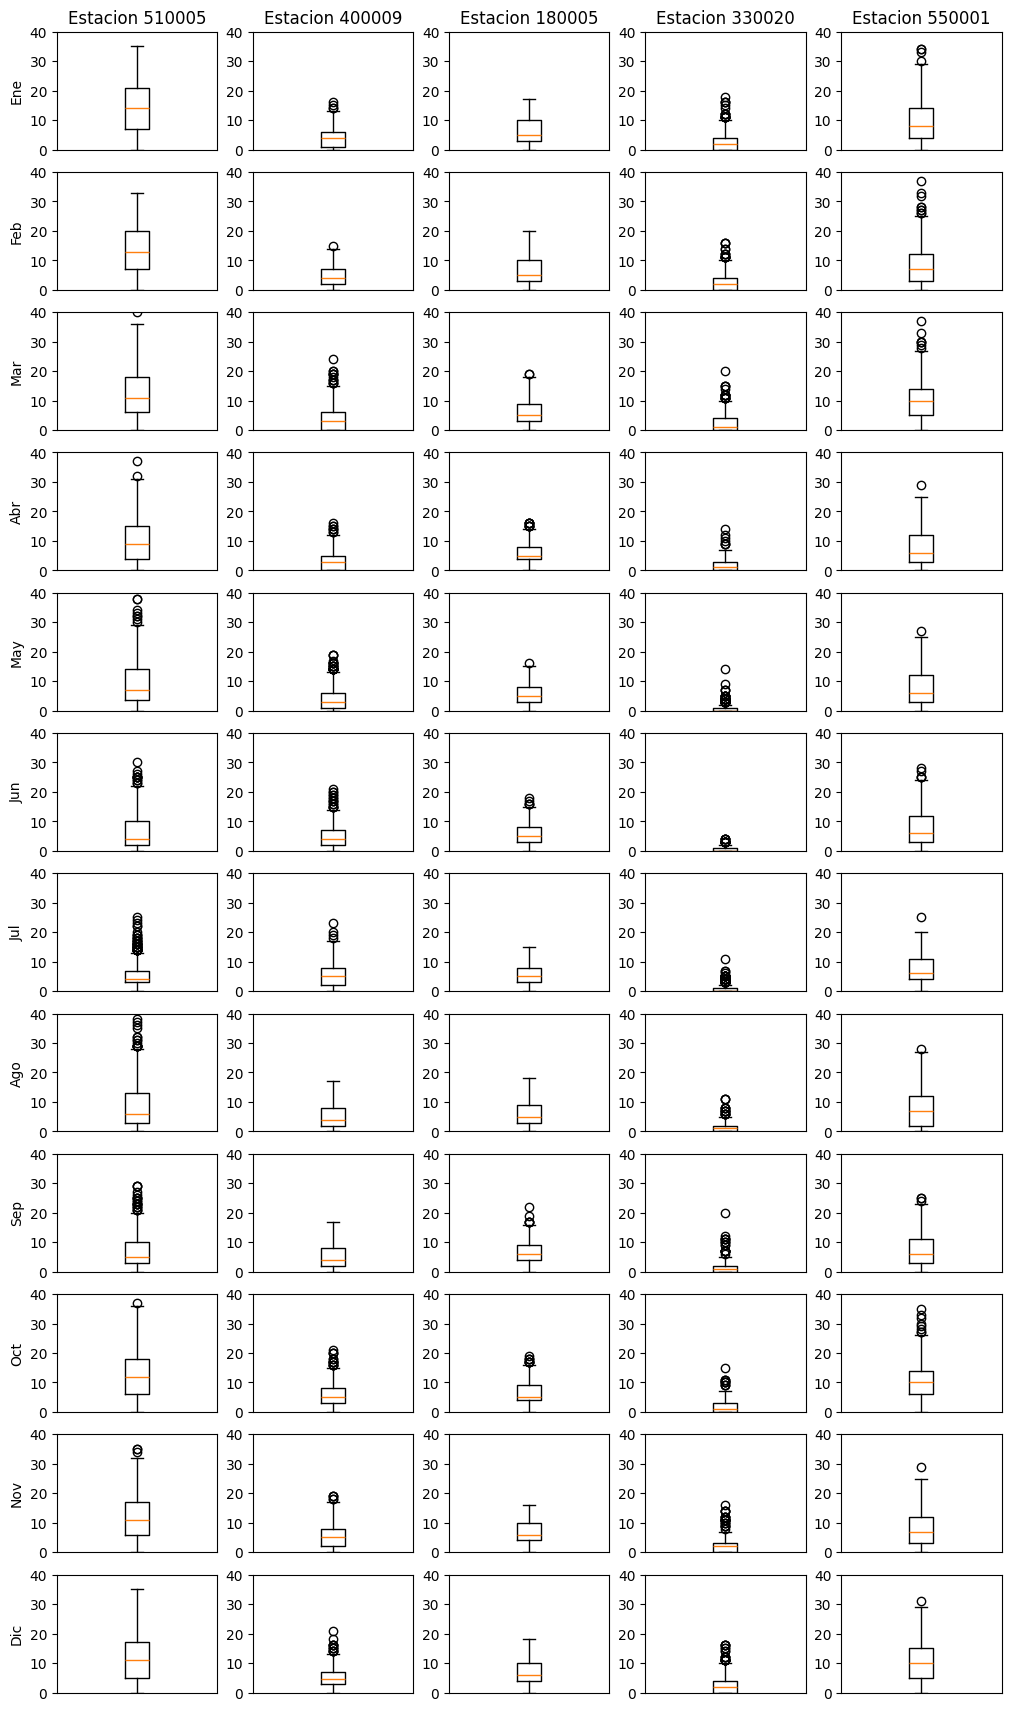

In [43]:
#Velocidad del viento promedio del año, medida por mes - Con media, desviacion estandar(CON OUTLIERS)
fig, axs = plt.subplots(12, len(ids), constrained_layout=True)
fig.set_figheight(17)

meses = ["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"]

for x in range(1,13):
    if(x < 10):
        filtered_df = bigDf[bigDf['momento'].str.contains('-0'+str(x)+'-')]
    else:
        filtered_df = bigDf[bigDf['momento'].str.contains('-'+str(x)+'-')]
    temp = pd.DataFrame(columns=ids)
    for y in range(len(ids)):
        est = filtered_df.query('ID_Estacion == '+ids[y])
        rawData = axs[x-1, y].boxplot(est["ff_Valor"].dropna())
        axs[x-1, 0].set_ylabel(meses[x-1])
        axs[x-1, y].set_ylim(0,40)
        axs[0, y].set_title("Estacion "+ids[y])
        axs[x-1, y].get_xaxis().set_visible(False)
plt.show()

In [14]:
#Regresion linear(Con widget!)
lrDf = pd.DataFrame()
lm = []
models = []
#fig, axs = plt.subplots(len(ids))
#fig.set_figheight(20)

sub_tab=[widgets.Output() for i in range(len(ids))]
tab = widgets.Tab(sub_tab)
for i in range (len(ids)):
    tab.set_title(i,"Estacion {}".format(ids[i]))
    filtered_df = bigDf.query('ID_Estacion == '+ids[i])
    lrDf["x"] = filtered_df["Ts_Valor"]
    lrDf["y"] = filtered_df["RadGInst (watt/m2)"]
    lrDf = lrDf.dropna(axis=0)
    X_axis=pd.DataFrame(lrDf["x"])
    Y_axis=pd.DataFrame(lrDf["y"])
    lm.append(LinearRegression())
    models.append(lm[i].fit(X_axis, Y_axis))
    display(models[i].score(X_axis, Y_axis))
    with sub_tab[i]:
        fig, axs = plt.subplots()
        #print(models[i].predict(X_axis))
        #print(models[i].coef_)
        #print(models[i].intercept_)
        axs.scatter(X_axis, Y_axis, s=3)
        axs.set_title("Regresion linear - Relacion temperatura y Radiacion solar \nAño 2023", bbox={'facecolor':'0.8', 'pad':5})
        axs.set_xlabel("Temperatura(C°)")
        axs.set_ylabel("Radiacion Global Instantanea(watt/m2)")
        axs.plot(X_axis,models[i].predict(X_axis),color='red',linewidth=2)
        axs.set_ylim(0,1200)
        axs.set_xlim(0,35)
        axs.grid()
        #data[i].hist(ax = axes)
        plt.show(fig)
    lrDf = pd.DataFrame()
display(tab)


0.23510748347885202

0.2992158101149832

0.3013151254889789

0.4078107635669398

0.24844055055056402

In [3]:
import numpy as np

data1 = pd.DataFrame(np.random.normal(size = 50))
data2 = pd.DataFrame(np.random.normal(size = 100))
data =[data1,data2]

sub_tab=[widgets.Output() for i in range(len(data))]
tab = widgets.Tab(sub_tab)
for i in range (len(data)):
    tab.set_title(i,"Tab {}".format(i+1))

    with sub_tab[i]:
        fig, axes = plt.subplots()
        data[i].hist(ax = axes)
        plt.show(fig)
display(tab)

In [2]:
bigDf.set_index(["ID_Estacion", "momento"], inplace=True)

NameError: name 'bigDf' is not defined

In [1]:
idx = pd.IndexSlice
print (bigDf.loc[idx[:, "01-02-2023":], :])

NameError: name 'pd' is not defined